In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data

ao = pd.read_csv('applesOranges.csv')
y = np.array(ao['y'])
X = np.array([np.ones(200),ao['x.1'],ao['x.2']])

In [353]:
# connectionist neuron
bias = 0
w = np.array([-bias,0,1])[:,None]
f = ((w.T@X)>=0).reshape(-1)

In [240]:
# Create a weight list

angle = 90
np.cos((np.pi)* (angle/180))
np.sin((np.pi)* (angle/180))
w_list = [np.array([-bias,np.cos((np.pi)*(angle/18)),np.sin((np.pi)*(angle/18))]).reshape(3,-1) for angle in range(0,37)]

Angle    178.50
Bias      -0.08
Error      0.30
Name: 358877, dtype: float64

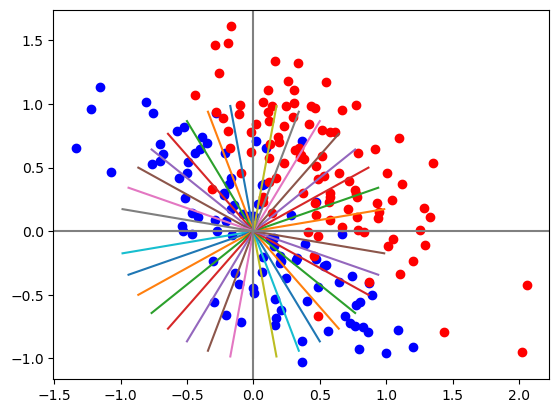

In [354]:
# Plot different weight vectors
for angle in range(0,37):
    plt.plot([[0],w_list[angle][1:][0]],
             [[0],w_list[angle][1:][1]])
plt.axhline(0,-2,2,color='gray')
plt.axvline(0,-2,2,color='gray')
plt.scatter(ao['x.1'][ao['y']==0],ao['x.2'][ao['y']==0],c='blue')
plt.scatter(ao['x.1'][ao['y']==1],ao['x.2'][ao['y']==1],c='red')

Min Error at: 20


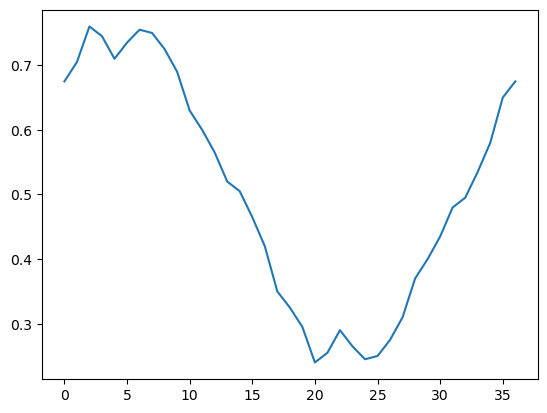

In [358]:
# Error rate
p = np.abs(sum(np.abs((((w_list[0].T@X)>=0).reshape(-1)*1) - y))-200)/200
error_rate = [np.abs(sum(np.abs((((w.T@X)>=0).reshape(-1)*1) - y))-200)/200 for w in w_list]
plt.plot(error_rate)
print('Min Error at:',np.argmin(error_rate))

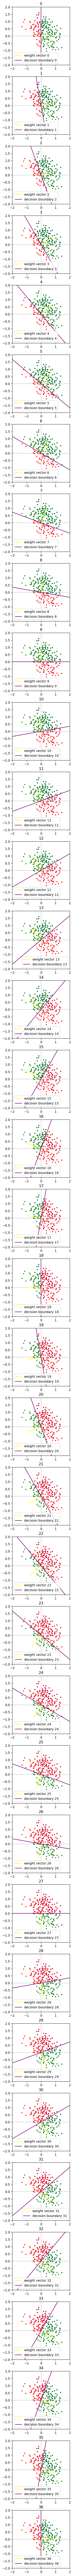

In [408]:
fig= plt.figure(figsize=(2.5,2.5)) 
ax_dict = {}

for list_place in range(0,37):
    
    
    # Calculate inverse and predictions
    w_1 = w_list[list_place][1,0]
    w_2 = w_list[list_place][2,0]
    w_inv = np.array([[w_2],[-w_1]])
    y_pred = (w_list[list_place].T@X)>=0

    # Plot result
    ax_dict[list_place] = fig.add_axes([0, -1.2*list_place, 1, 1])
    #ax = fig.add_axes([0, 0, 1, 1])
    plt.axhline(0,-2,2,color='gray',lw=0.5)
    plt.axvline(0,-2,2,color='gray',lw=0.5)
    ax_dict[list_place].set_title(f'{list_place}')
    
    # Plot weight vector
    plt.plot([[0],w_list[list_place][1:][0]],
             [[0],w_list[list_place][1:][1]],
             color='yellow',label=f'weight vector {list_place}')
    
    # Plot decision boundary
    plt.plot([w_inv[0,0]*-10**3,w_inv[0,0]*10**3],
             [w_inv[1,0]*-10**3,w_inv[1,0]*10**3],color='purple',label=f'decision boundary {list_place}')
    plt.scatter(ao['x.1'][ao['y']==0],ao['x.2'][ao['y']==0],c='pink',s=5)
    plt.scatter(ao['x.1'][ao['y']==1],ao['x.2'][ao['y']==1],c='blue',s=5)
    
    # Plot predicted classification
    plt.scatter(X[1,:][np.where(y_pred)[1]],X[2,:][np.where(y_pred)[1]],c='green',s=5)
    plt.scatter(X[1,:][np.where((y_pred*1)==0)[1]],X[2,:][np.where((y_pred*1)==0)[1]],c='red',s=5)
    
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax_dict[list_place].legend()
    ax_dict[list_place].plot()

(-2.0, 2.0)

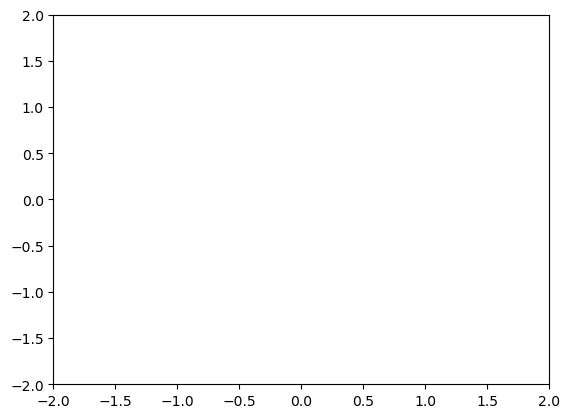

In [367]:
plt.plot([w_inv[0,0]*-10**3,w_inv[0,0]*10**40],[w_inv[1,0]*-10**40,w_inv[1,0]*10**3],color='purple')


In [ ]:
# Grid search
bias = 0
angle = 90
df = pd.DataFrame(columns=['Angle'])
df['Angle'] = np.arange(0,180.1,0.1)
df = df.join(pd.Series(np.arange(-1,1.01,0.01),name='Bias'),how='cross')

def calculate_error(series):

    bias = series[1]
    angle = series[0]
    
    w = np.array([[-bias],[np.cos(np.pi * angle/180)],[np.sin(np.pi * angle/180)]])
    p = np.abs(sum(np.abs((((w.T@X)>=0).reshape(-1)*1) - y))-200)/200
    #print(bias,angle,p)
    return p

df['Error'] = df.apply(calculate_error,axis=1)
df['Error'] = df.apply(calculate_error,axis=1)
df.iloc[np.argmin(df['Error'])]


In [13]:
plt.plot()

Angle    178.50
Bias      -0.08
Error      0.30
Name: 358877, dtype: float64

In [ ]:
# Plot different weight vectors
angle
bias
    plt.plot([[0],np.cos(np.pi * )],
             [[0],w_list[angle][1:][1]])
plt.axhline(0,-2,2,color='gray')
plt.axvline(0,-2,2,color='gray')
plt.scatter(ao['x.1'][ao['y']==0],ao['x.2'][ao['y']==0],c='blue')
plt.scatter(ao['x.1'][ao['y']==1],ao['x.2'][ao['y']==1],c='red')